In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,20) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_test original shape (10000, 28, 28)
y_test original shape (10000,)
X_train original shape (60000, 28, 28)
y_train original shape (60000,)


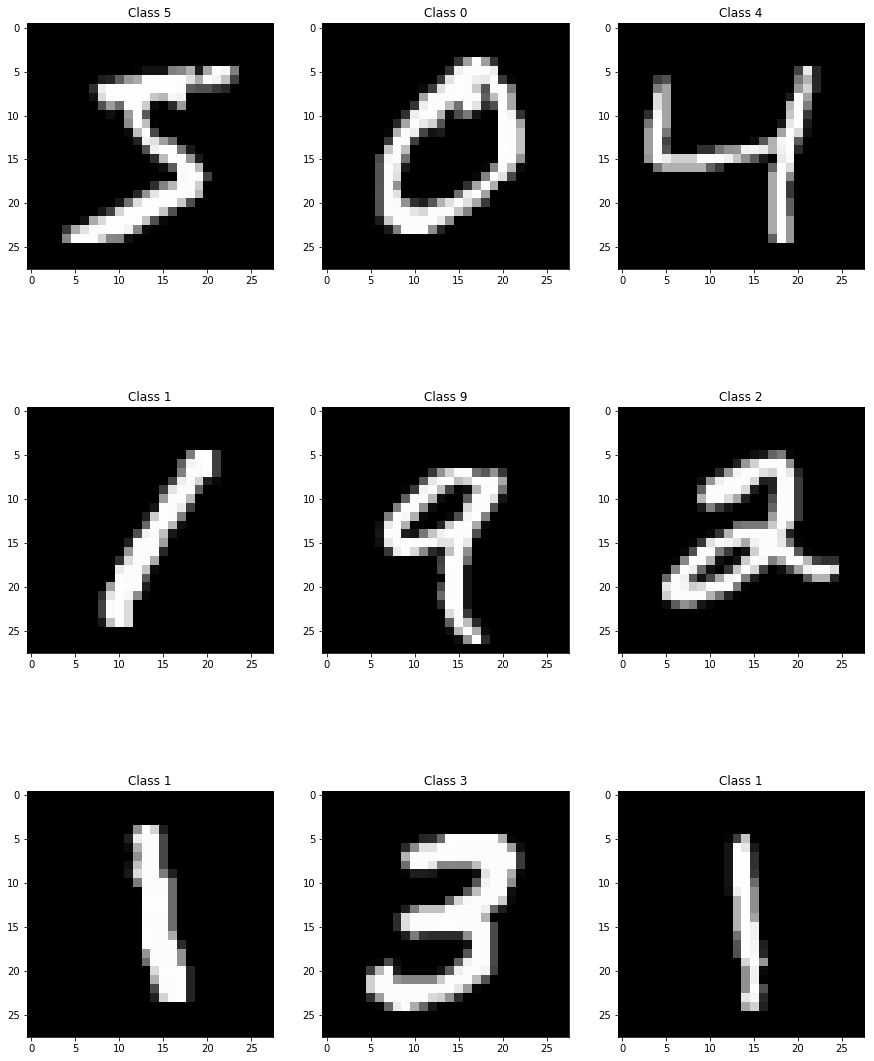

In [3]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
    plt.show

In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [5]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print("Training matrix shape", Y_train.shape)
print("Testing matrix shape", Y_test.shape)

Training matrix shape (60000, 10)
Testing matrix shape (10000, 10)


In [ ]:
model = Sequential()

model.add(Dense(512, input_shape=(784,)))
model.add(Activation('softsign'))
model.add(Dropout(0.2))

model.add(Dense(512, input_shape=(784,)))
model.add(Activation('softsign'))
model.add(Dropout(0.2))

model.add(Dense(256, input_shape=(784,)))
model.add(Activation('softsign'))
model.add(Dropout(0.2))

model.add(Dense(256, input_shape=(784,)))
model.add(Activation('softplus'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

In [6]:
model = Sequential()

model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(384, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(256, input_shape=(784,)))
model.add(Activation('softsign'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

In [8]:
model.fit(X_train, Y_train,
          batch_size=128, nb_epoch=6,
          # show_accuracy=True, verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 15s - loss: 0.2604 - acc: 0.9215 - val_loss: 0.1141 - val_acc: 0.9637

In [13]:
score = model.evaluate(X_test, Y_test, show_accuracy=True, verbose=0)
print('Test score: ', score[0])
print('Test accuracy: ', score[1])

/home/mat/.local/lib/python3.5/site-packages/keras/models.py:697: UserWarning: The "show_accuracy" argument is deprecated, instead you should pass the "accuracy" metric to the model at compile time:
`model.compile(optimizer, loss, metrics=["accuracy"])`
  warnings.warn('The "show_accuracy" argument is deprecated, '


Test score:  0.0728317225511
Test accuracy:  0.9786


In [17]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

 9952/10000 [============================>.] - ETA: 0s

In [18]:
predicted_classes_train = model.predict_classes(X_train)


correct_indices_train = np.nonzero(predicted_classes_train == y_train)[0]
incorrect_indices_train = np.nonzero(predicted_classes_train != y_train)[0]

59744/60000 [============================>.] - ETA: 0s 

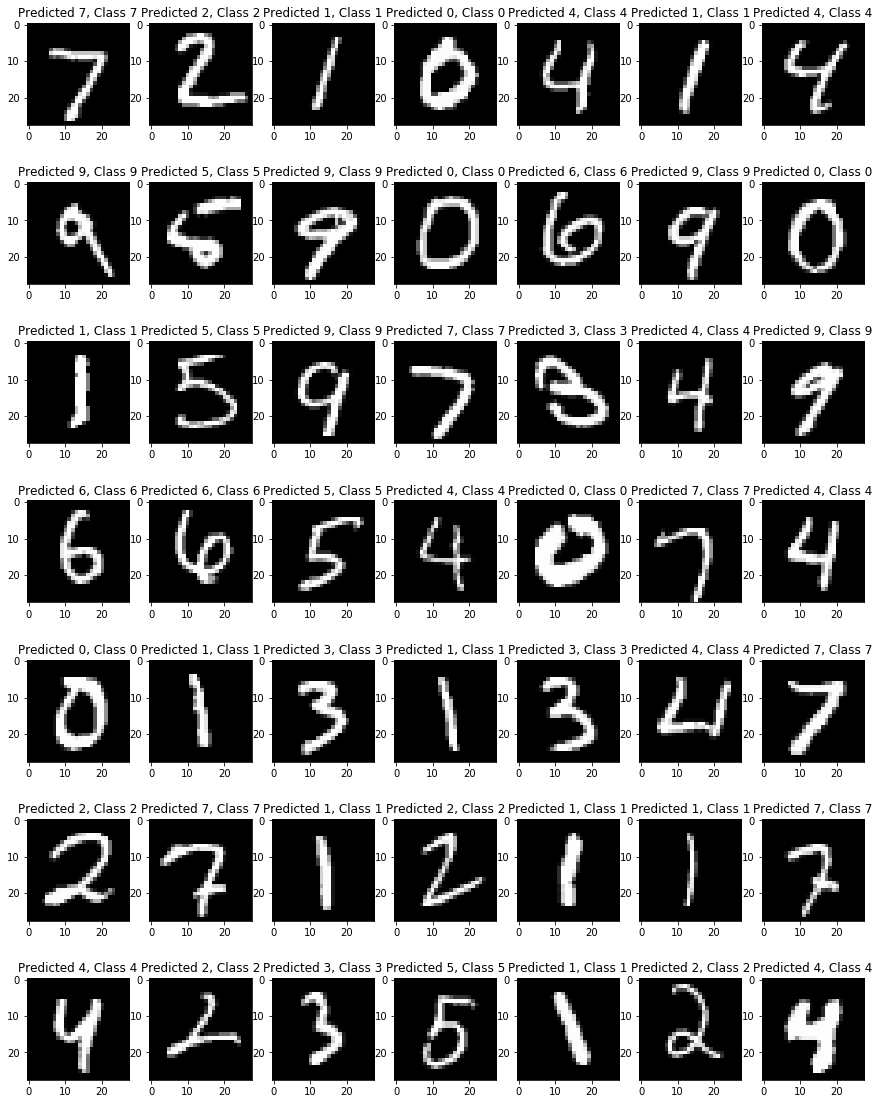

In [19]:
plt.figure()
for i, correct in enumerate(correct_indices[:49]):
    plt.subplot(7,7,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

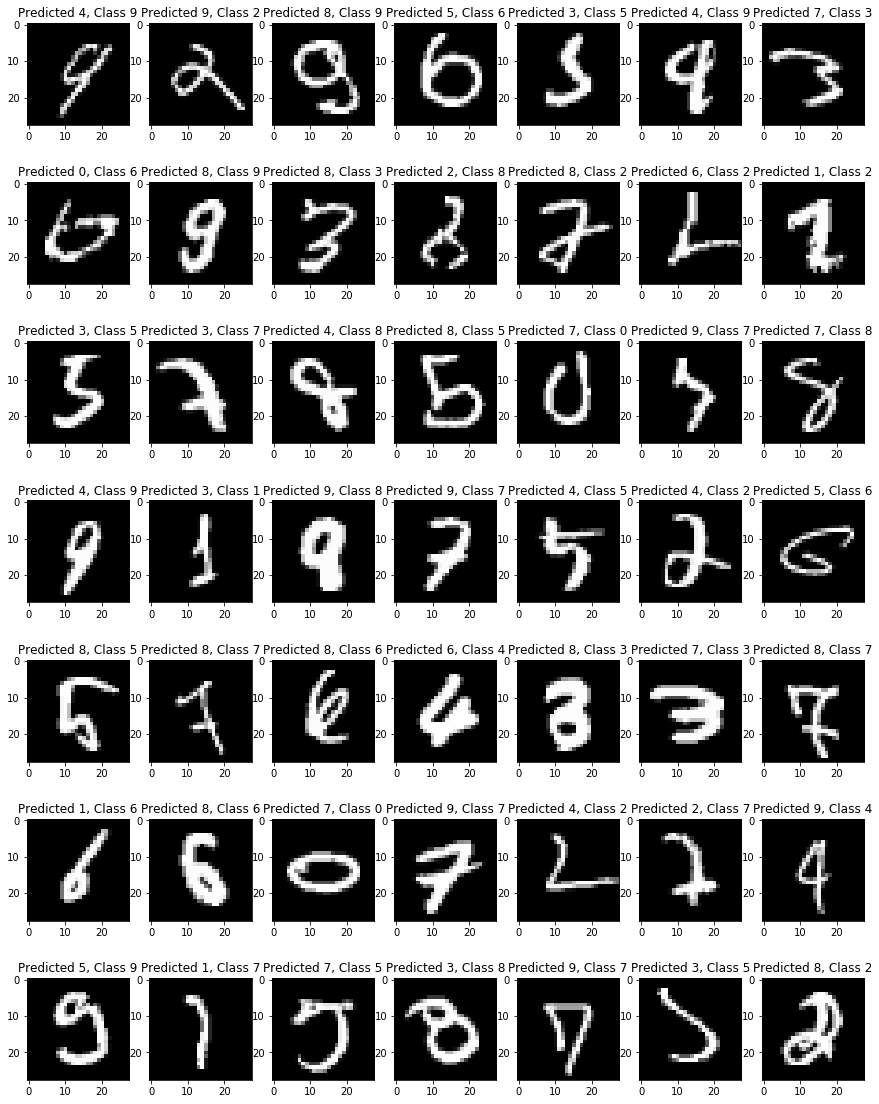

In [20]:
   
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:49]):
    plt.subplot(7,7,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))